# Předpokládaná délka života

## Předzpracování dat

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import matplotlib.colors as colors
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
rd_seed = 40
import warnings

In [113]:
ridge_data = pd.read_csv('data.csv')
forest_data = pd.read_csv('data.csv')
KNN_data = pd.read_csv('data.csv')

Začnu data zpracovávat pro hřebenovou regresi.

In [114]:
def splitData(data, y_collumn):
    Xdata = data.drop(y_collumn, axis=1)
    ydata = data[y_collumn]
    Xtrain, Xtest, ytrain, ytest = train_test_split(
        Xdata, ydata, test_size=0.3, random_state=rd_seed
    )
    Xval, Xtest, yval, ytest = train_test_split(
        Xtest, ytest, test_size=0.5, random_state=rd_seed
    )
    return Xtrain, ytrain, Xval, yval, Xtest, ytest

In [115]:
Xtrain, ytrain, Xval, yval, Xtest, ytest = splitData(ridge_data, 'Life expectancy')

In [116]:
display(Xtrain.info())
display(Xtrain.head())
display(Xtrain.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 1526 to 2267
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1902 non-null   object 
 1   Year                             1902 non-null   int64  
 2   Status                           1902 non-null   object 
 3   Adult Mortality                  1902 non-null   float64
 4   infant deaths                    1902 non-null   int64  
 5   Alcohol                          1788 non-null   float64
 6   percentage expenditure           1902 non-null   float64
 7   Hepatitis B                      1536 non-null   float64
 8   Measles                          1902 non-null   int64  
 9   BMI                              1878 non-null   float64
 10  under-five deaths                1902 non-null   int64  
 11  Polio                            1889 non-null   float64
 12  Total expenditure

None

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1526,Mauritius,2015,Developing,146.0,0,NaN,0.000000,97.0,0,33.3,...,98.0,NaN,97.0,0.1,9252.117240,1.262650e+05,6.9,6.8,0.779,15.2
2594,United States of America,2001,Developed,115.0,28,8.25,0.000000,89.0,116,6.9,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
1523,Mauritania,2002,Developing,228.0,7,0.02,4.113191,NaN,883,22.3,...,91.0,5.31,89.0,1.2,46.954232,2.873228e+06,1.5,1.3,0.446,6.5
2647,Venezuela (Bolivarian Republic of),2012,Developing,161.0,9,6.70,0.000000,81.0,1,6.4,...,73.0,4.80,81.0,0.1,NaN,NaN,1.6,1.5,0.767,14.1
1099,India,2004,Developing,214.0,1600,1.20,27.338009,6.0,55443,13.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1902.000000,1902.000000,1902.000000,1788.000000,1902.000000,1536.000000,1902.000000,1878.000000,1902.000000,1889.000000,1767.000000,1889.000000,1902.000000,1623.000000,1.478000e+03,1878.000000,1878.000000,1802.000000,1802.000000
mean,2007.066772,165.882229,31.407466,4.583881,757.058045,80.227214,2435.195584,37.653994,43.074658,82.910005,5.884131,82.142933,1.798686,7489.614726,1.431221e+07,4.981789,5.017465,0.624599,11.962486
std,4.549946,123.607173,125.573494,4.049043,2013.715166,25.765842,11541.730289,19.924373,168.293626,22.647266,2.465090,23.905661,5.084390,14294.016716,7.298245e+07,4.587810,4.684562,0.212712,3.330598
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,75.000000,0.000000,0.877500,6.475718,76.000000,0.000000,18.900000,0.000000,78.000000,4.205000,78.000000,0.100000,462.333781,2.031178e+05,1.600000,1.600000,0.493250,10.200000
50%,2007.000000,145.000000,3.000000,3.635000,68.632848,92.000000,17.000000,42.500000,4.000000,93.000000,5.670000,92.000000,0.100000,1713.475940,1.456252e+06,3.400000,3.400000,0.674000,12.200000
75%,2011.000000,226.750000,22.000000,7.655000,459.145756,96.000000,409.500000,55.700000,28.000000,97.000000,7.490000,97.000000,0.800000,5903.413690,8.185910e+06,7.300000,7.300000,0.778000,14.200000
max,2015.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,2400.000000,99.000000,17.000000,99.000000,50.300000,119172.741800,1.293859e+09,27.500000,28.500000,0.938000,20.700000


### Chybějicí hodnoty, outlieři

In [117]:
def missingValuesGraph(df, name):
    fig, ax = plt.subplots(figsize=(16, 6))
    cmap = colors.ListedColormap(["darkslategrey", "white"])
    ax.imshow(
        df.isna(),
        aspect="auto",
        cmap=cmap,
        interpolation="none",
        vmin=0,
        vmax=1,
    )
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows Index")

    num_columns = len(df.columns)

    ax.set_xticks(np.arange(num_columns))
    ax.tick_params(axis="x", which="major", length=0)
    ax.set_xticklabels(df.columns, rotation=45, ha="right")

    ax.set_xticks(np.arange(0.5, num_columns + 0.5, 1), minor=True)

    legend_elements = [
        Patch(facecolor="darkslategrey", edgecolor="black", label="Present Value"),
        Patch(facecolor="white", edgecolor="black", label="Missing Value"),
    ]

    ax.legend(
        handles=legend_elements,
        loc="upper right",
        bbox_to_anchor=(1.05, -0.1),
        borderaxespad=0.0,
    )

    ax.grid(
        which="minor",
        visible=True,
        axis="x",
        color="white",
        linestyle="-",
        linewidth=1.0,
    )
    ax.grid(
        which="major",
        visible=False,
        axis="x",
    )

    ax.grid(
        which="major",
        visible=False,
        axis="y",
    )

    ax.set_yticks(range(0, len(df), max(1, len(df) // 5)))
    ax.set_title(f"Missing Values in {name}")

In [118]:
def hist_box(df, cont_col, bins):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

    sns.histplot(df[cont_col], bins=bins, kde=False, ax=ax[0])
    ax[0].set_title(f"{cont_col.capitalize()} Distribution in Dataset")
    ax[0].set_xlabel(cont_col.capitalize())
    ax[0].set_ylabel("Frequency")

    sns.boxplot(x=df[cont_col], ax=ax[1])
    ax[1].set_title(f"Box Plot of {cont_col.capitalize()} in Dataset")
    ax[1].set_xlabel(cont_col.capitalize())

    plt.tight_layout()
    plt.show()
    display(df[cont_col].describe())

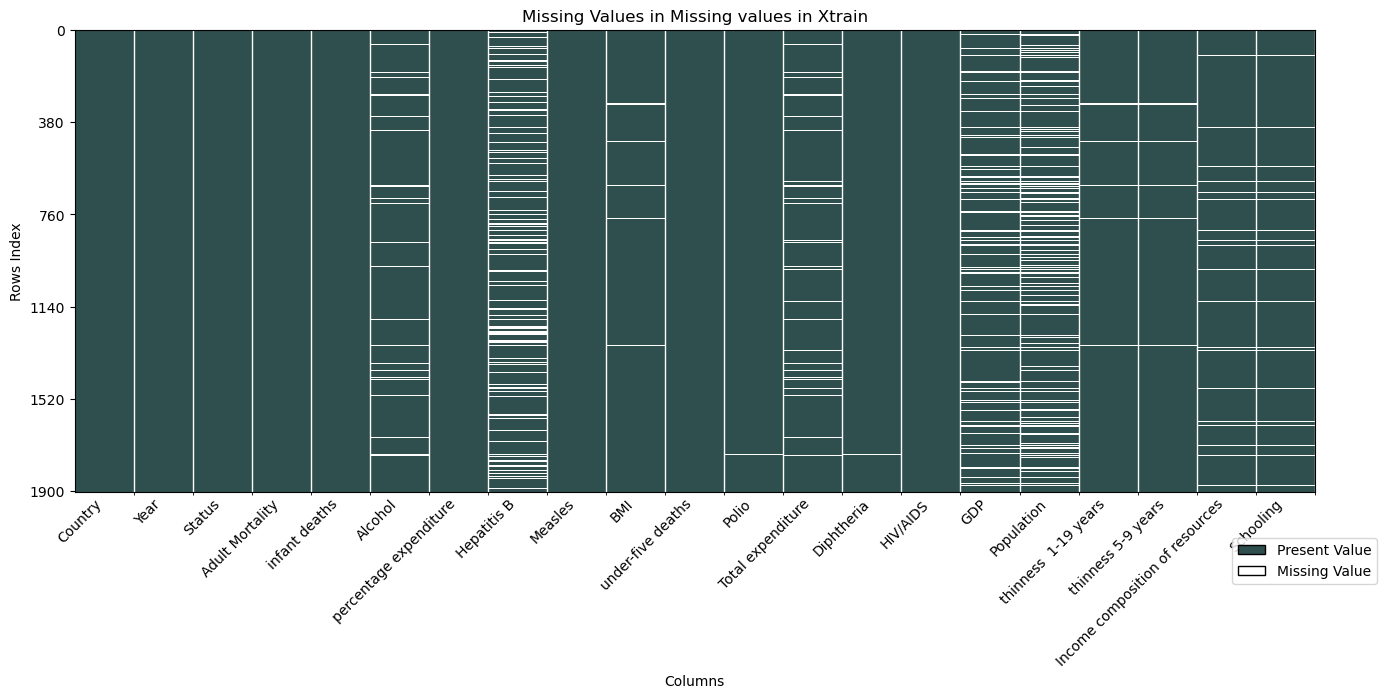

In [119]:
missingValuesGraph(Xtrain, "Missing values in Xtrain")

### Analýza sloupců

#### Country, Status

In [120]:
print(Xtrain['Country'].unique())
Xtrain['Country'].nunique()

['Mauritius' 'United States of America' 'Mauritania'
 'Venezuela (Bolivarian Republic of)' 'India' 'Russian Federation'
 'Kiribati' 'Sierra Leone' 'Chad' 'Thailand' 'Pakistan' 'Papua New Guinea'
 'Croatia' 'Senegal' 'Japan' 'Indonesia' 'Ecuador' 'Afghanistan' 'Brazil'
 'Latvia' 'Guatemala' 'New Zealand'
 'The former Yugoslav republic of Macedonia' 'Yemen' 'Equatorial Guinea'
 'Bahamas' 'Bahrain' 'Uzbekistan' "Democratic People's Republic of Korea"
 'Israel' 'Nicaragua' 'Botswana' 'Liberia' 'Sweden' 'Bulgaria'
 'Azerbaijan' 'Madagascar' 'Djibouti' 'Belgium' 'Saint Lucia' 'Rwanda'
 'Guinea' 'Ethiopia' 'France' 'Australia' 'Malaysia' 'Tunisia' 'Maldives'
 'Cuba' 'Cyprus' 'Benin' "Côte d'Ivoire" 'Uganda' 'Vanuatu' 'Greece'
 'Ukraine' 'Peru' 'United Republic of Tanzania' 'Colombia' 'Qatar'
 'United Kingdom of Great Britain and Northern Ireland' 'Suriname'
 'United Arab Emirates' 'Chile' 'Slovenia' 'Kenya' 'Luxembourg'
 'Dominican Republic' 'Cambodia' 'Iran (Islamic Republic of)'
 'Bolivia (

183

['Developing' 'Developed']
Developing    1590
Developed      312
Name: Status, dtype: int64


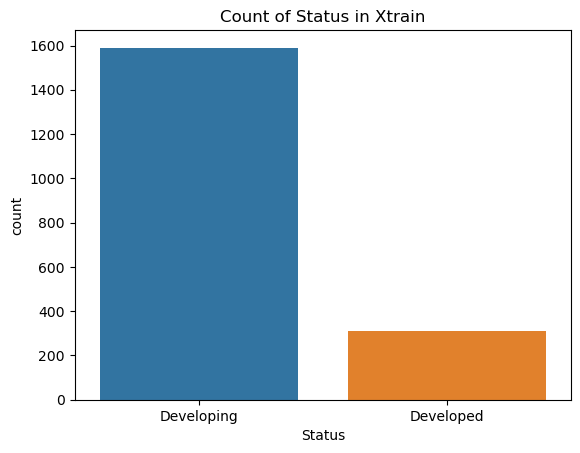

In [121]:
print(Xtrain['Status'].unique())
print(Xtrain['Status'].value_counts())
sns.countplot(x='Status', data=Xtrain)
plt.title('Count of Status in Xtrain')
plt.show()

#### Year

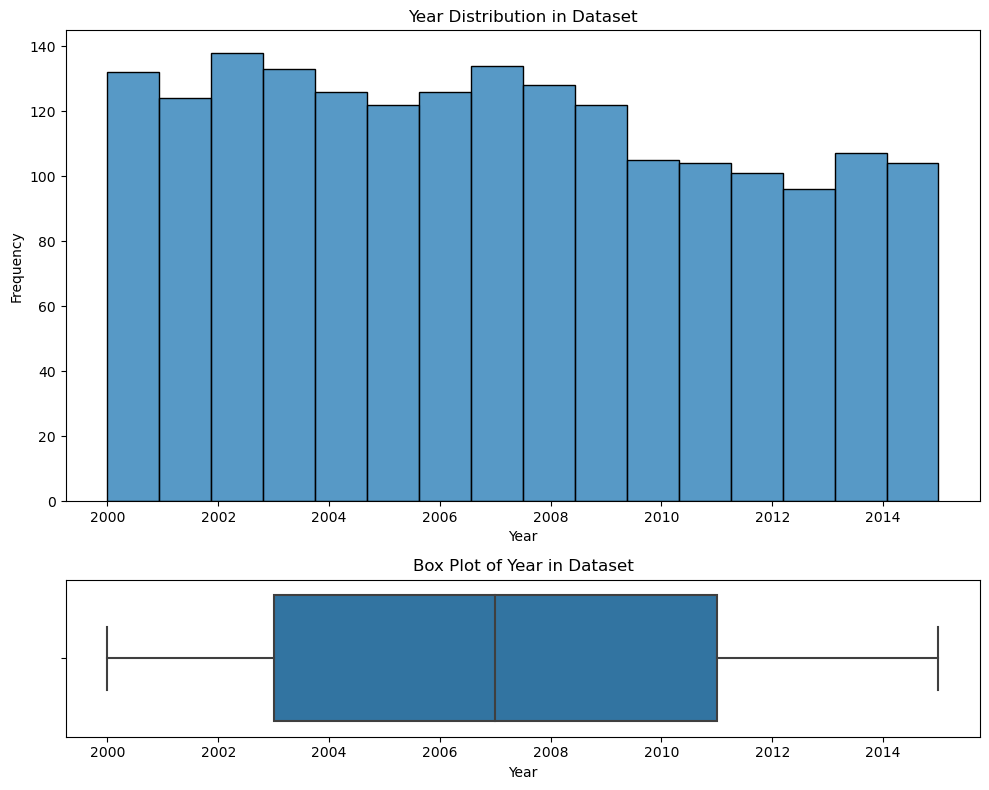

count    1902.000000
mean     2007.066772
std         4.549946
min      2000.000000
25%      2003.000000
50%      2007.000000
75%      2011.000000
max      2015.000000
Name: Year, dtype: float64

In [122]:
hist_box(Xtrain, 'Year', Xtrain['Year'].nunique())

#### Adult mortality, infant deaths, under-five deaths

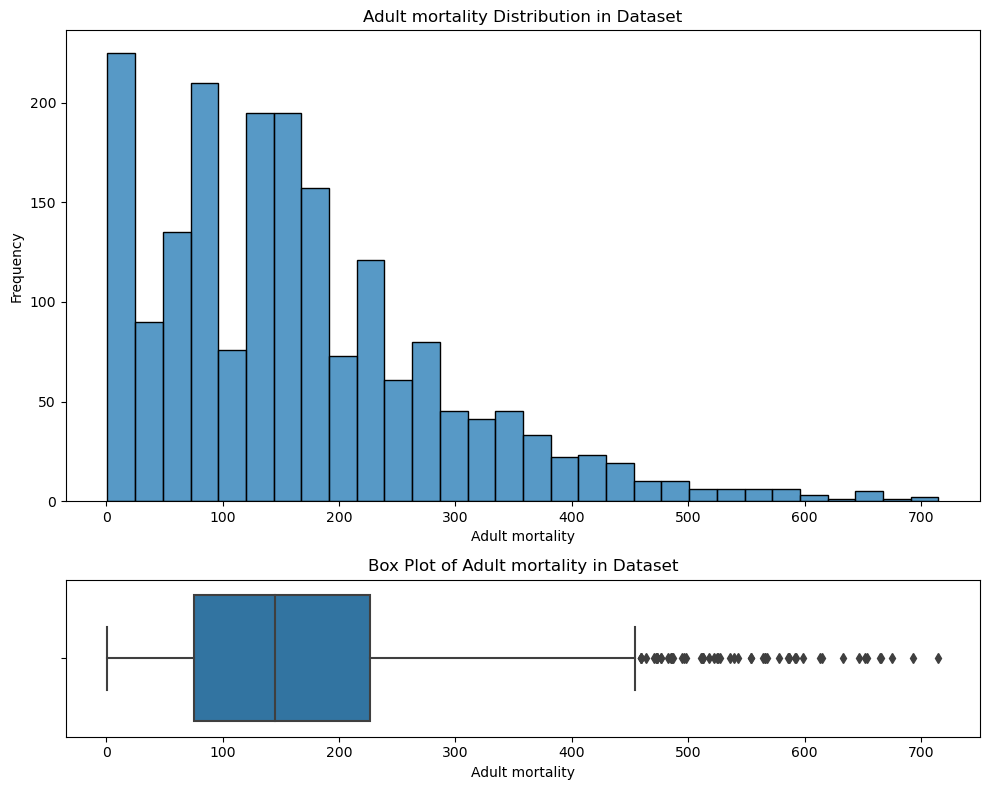

count    1902.000000
mean      165.882229
std       123.607173
min         1.000000
25%        75.000000
50%       145.000000
75%       226.750000
max       715.000000
Name: Adult Mortality, dtype: float64

In [123]:
hist_box(Xtrain, 'Adult Mortality', 'auto')

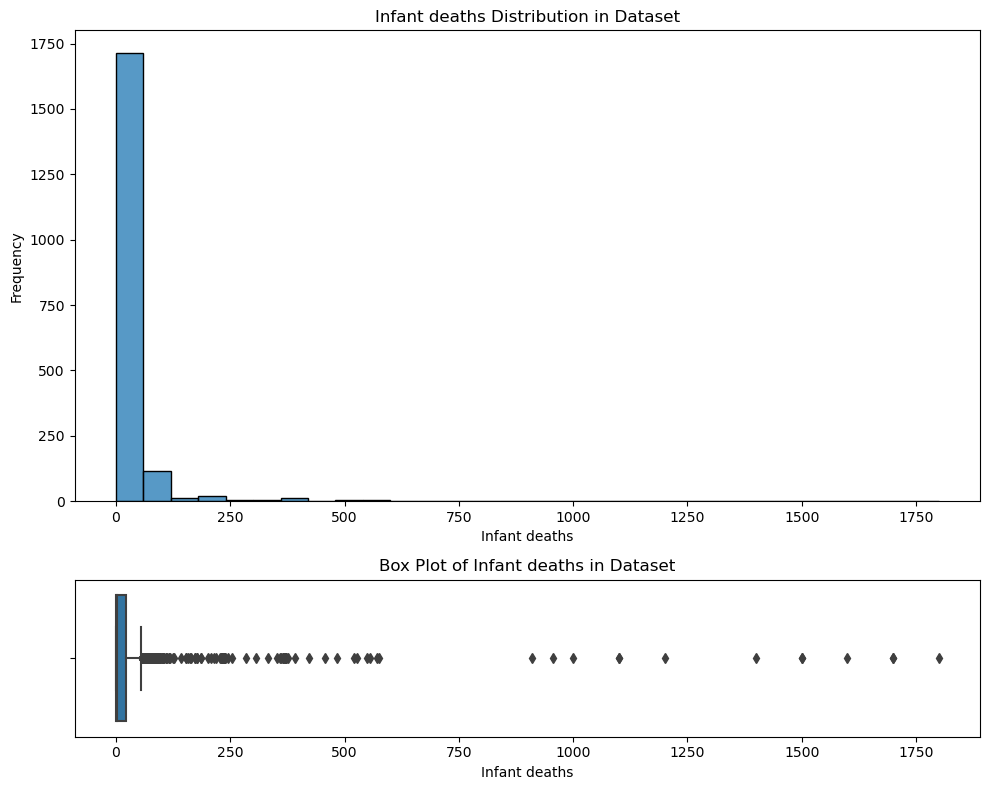

count    1902.000000
mean       31.407466
std       125.573494
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: infant deaths, dtype: float64

In [124]:
hist_box(Xtrain, 'infant deaths', 30)

Z grafu vidíme, že existují odlehlé hodnoty, které jsou větší než 1000. To je určitě špatně. Zkusím ty záznamy blíže prouzkoumat.

In [125]:
display(Xtrain[Xtrain['infant deaths'] > 750].sort_values(by='Year')[['Country', 'Year', 'infant deaths']])
print(Xtrain[Xtrain['infant deaths'] > 750].sort_values(by='Year')[['Country', 'Year', 'infant deaths']].shape)
display(Xtrain[Xtrain['Country'] == 'India'].sort_values(by='Year'))

,Country,Year,infant deaths
1102,India,2001,1800
1101,India,2002,1700
1100,India,2003,1700
1099,India,2004,1600
1098,India,2005,1500
1097,India,2006,1500
1096,India,2007,1400
1093,India,2010,1200
1092,India,2011,1100
1091,India,2012,1100


(13, 3)


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1102,India,2001,Developing,222.0,1800,1.00,19.003406,NaN,51780,11.8,...,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
1101,India,2002,Developing,219.0,1700,1.10,17.812056,NaN,40044,12.2,...,58.0,4.40,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
1100,India,2003,Developing,216.0,1700,1.19,19.480868,NaN,47147,12.6,...,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
1099,India,2004,Developing,214.0,1600,1.20,27.338009,6.0,55443,13.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1098,India,2005,Developing,211.0,1500,1.27,3.509637,8.0,36711,13.5,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1097,India,2006,Developing,28.0,1500,1.37,34.859427,6.0,64185,13.9,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1096,India,2007,Developing,26.0,1400,1.59,5.234770,6.0,41144,14.4,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1093,India,2010,Developing,196.0,1200,2.77,57.733599,38.0,31458,15.9,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1092,India,2011,Developing,193.0,1100,3.00,64.605901,44.0,33634,16.4,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1091,India,2012,Developing,19.0,1100,3.10,64.969645,73.0,18668,17.0,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3


Všechny hodnoty pochází z Indie. Vypadá to na systematickou chybu. Hodnoty nejsou dostatečeně vysoké, aby to byly absolutní hodnoty úmrtí. Abych je vrátil do rozsahu, tak je vynásobím: průměr_dataset/hodnota z 2015. (resp. vydělím hodnotou, o kolik je větší hodnota z roku 2015 oproti průměru). Tím jistě vrátím všechny hodnoty do rozsahu 0-1000. Zároveň zachovám klesající trend.

In [126]:
Xtrain.loc[Xtrain['infant deaths'] > 750, 'infant deaths'] /= (910/(Xtrain['infant deaths'].mean()))

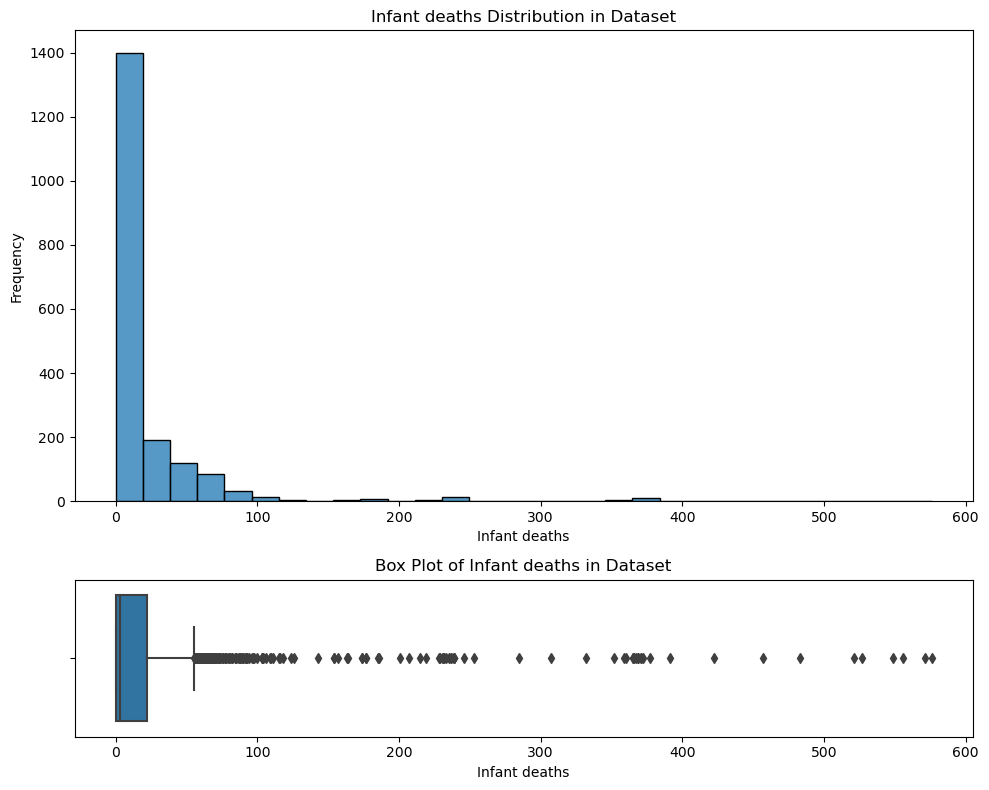

count    1902.000000
mean       22.540931
std        57.437402
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max       576.000000
Name: infant deaths, dtype: float64

In [ ]:
hist_box(Xtrain, 'infant deaths', 30) #po uprave

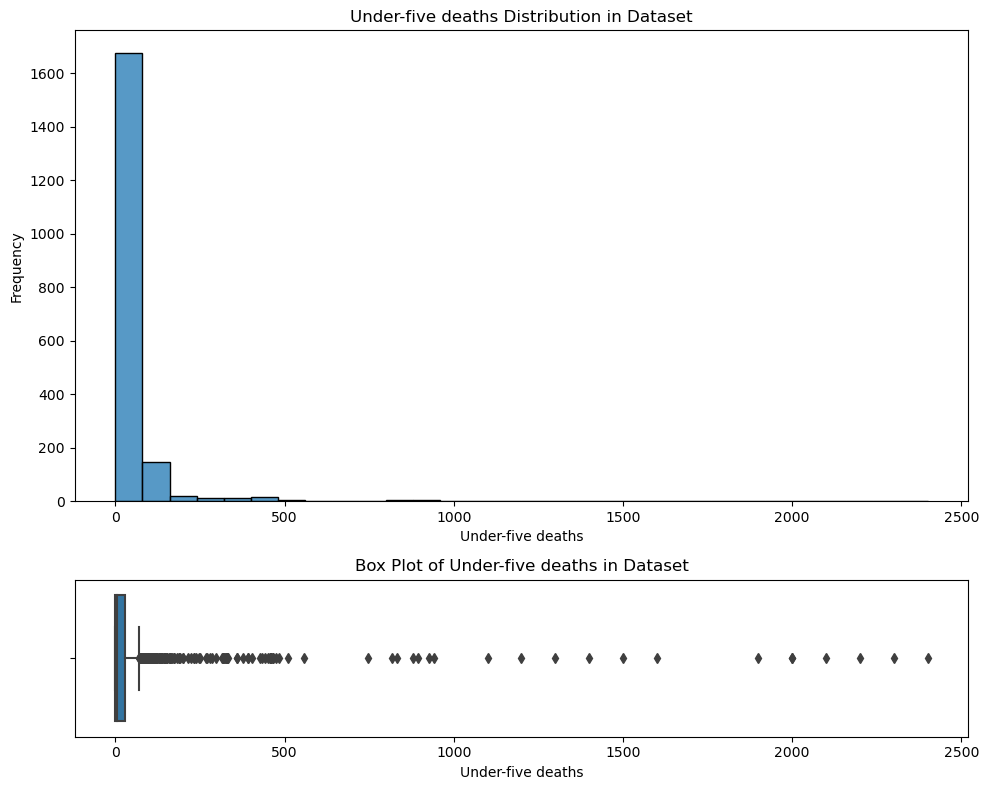

count    1902.000000
mean       43.074658
std       168.293626
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2400.000000
Name: under-five deaths, dtype: float64

In [128]:
hist_box(Xtrain, 'under-five deaths', 30)

Podobný problém nastává i ve sloupci under-five deaths. Podívám se na hodnoty větší než 1000.

In [ ]:
display(Xtrain[Xtrain['under-five deaths'] > 1000].sort_values(by='Year')[['Country', 'Year', 'under-five deaths']])
print(Xtrain[Xtrain['under-five deaths'] > 1000].sort_values(by='Year')[['Country', 'Year', 'under-five deaths']].shape)
display(Xtrain[Xtrain['Country'] == 'India'].sort_values(by='Year'))

,Country,Year,infant deaths,under-five deaths
1102,India,2001,62.124658,2400
1101,India,2002,58.673288,2300
1100,India,2003,58.673288,2200
1099,India,2004,55.221918,2100
1098,India,2005,51.770548,2000
1097,India,2006,51.770548,2000
1096,India,2007,48.319178,1900
1093,India,2010,41.416438,1600
1092,India,2011,37.965069,1500
1091,India,2012,37.965069,1400


(13, 4)


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1102,India,2001,Developing,222.0,62.124658,1.00,19.003406,NaN,51780,11.8,...,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
1101,India,2002,Developing,219.0,58.673288,1.10,17.812056,NaN,40044,12.2,...,58.0,4.40,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
1100,India,2003,Developing,216.0,58.673288,1.19,19.480868,NaN,47147,12.6,...,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
1099,India,2004,Developing,214.0,55.221918,1.20,27.338009,6.0,55443,13.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1098,India,2005,Developing,211.0,51.770548,1.27,3.509637,8.0,36711,13.5,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1097,India,2006,Developing,28.0,51.770548,1.37,34.859427,6.0,64185,13.9,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1096,India,2007,Developing,26.0,48.319178,1.59,5.234770,6.0,41144,14.4,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1093,India,2010,Developing,196.0,41.416438,2.77,57.733599,38.0,31458,15.9,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1092,India,2011,Developing,193.0,37.965069,3.00,64.605901,44.0,33634,16.4,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1091,India,2012,Developing,19.0,37.965069,3.10,64.969645,73.0,18668,17.0,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3


Stejné řádky jako v minulém případě. Vyřeším obdobně. 

nova_hodnota = hodnota / (Nejnověší záznam / průměr sloupce).

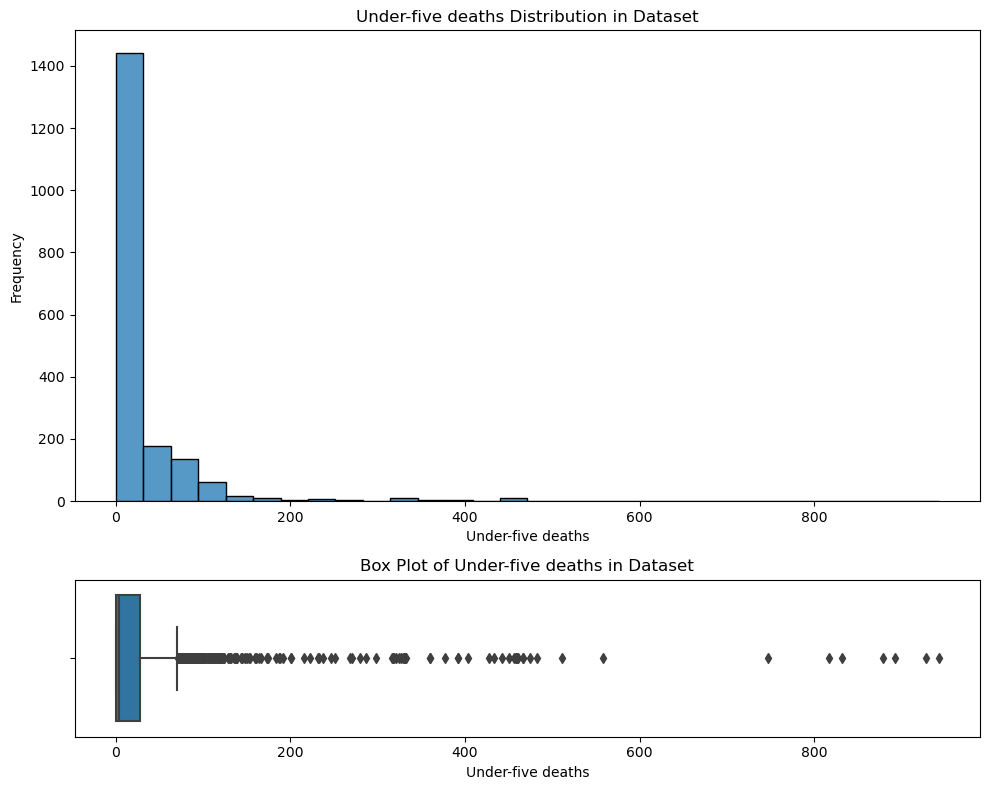

count    1902.000000
mean       31.455653
std        81.201446
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max       943.000000
Name: under-five deaths, dtype: float64

In [130]:
Xtrain.loc[Xtrain['under-five deaths'] > 1000, 'under-five deaths'] /= (1100/(Xtrain['under-five deaths'].mean()))
hist_box(Xtrain, 'under-five deaths', 30) #po uprave

#### Hepatitis B, Measles, Polio, HIV/AIDS, Diphtheria

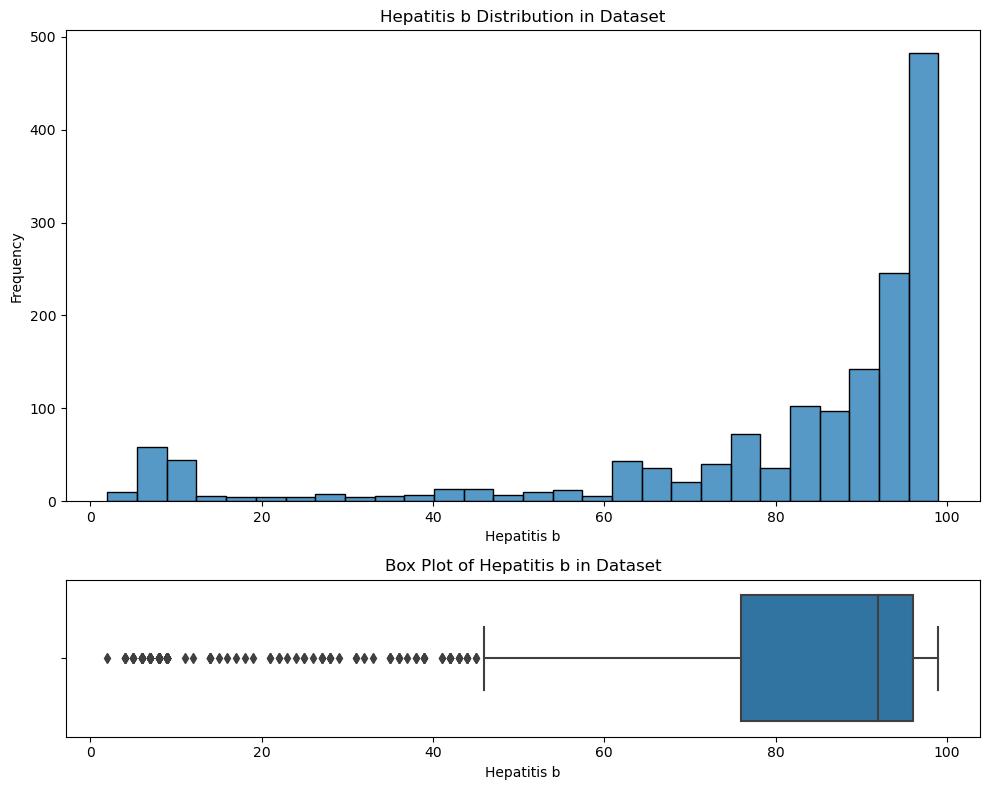

count    1536.000000
mean       80.227214
std        25.765842
min         2.000000
25%        76.000000
50%        92.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [131]:
hist_box(Xtrain, 'Hepatitis B', 'auto')

Rozsahy hodnot vypadají v pořádku. Nicméně existují chybějící hodnoty.

Country  Year  Hepatitis B
Country                                 
Algeria 35    Algeria  2000          NaN
        33    Algeria  2002          NaN
        32    Algeria  2003          NaN
        31    Algeria  2004         81.0
        30    Algeria  2005         83.0
...               ...   ...          ...
Zambia  2696   Zambia  2005         82.0
        2695   Zambia  2006         81.0
        2694   Zambia  2007          8.0
        2693   Zambia  2008         87.0
        2692   Zambia  2009         94.0

[987 rows x 3 columns]

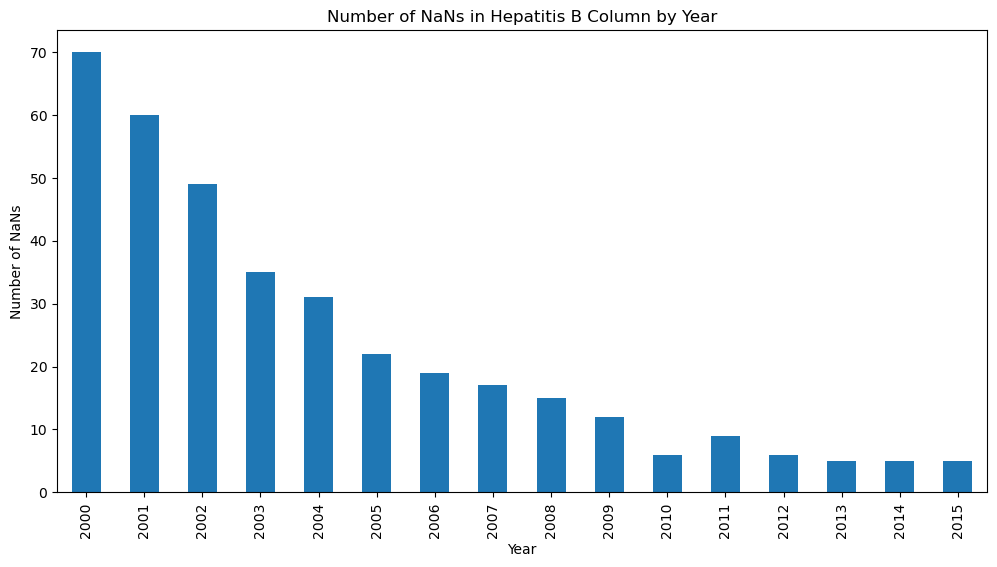

In [151]:
hepa_miss = set(Xtrain[Xtrain['Hepatitis B'].isna()]['Country'].unique())
display(Xtrain[Xtrain['Country'].isin(hepa_miss)].groupby('Country').apply(lambda x: x.sort_values(by='Year'))[['Country', 'Year', 'Hepatitis B']])

nan_counts = Xtrain.groupby('Year')['Hepatitis B'].apply(lambda x: x.isna().sum())
nan_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of NaNs in Hepatitis B Column by Year')
plt.xlabel('Year')
plt.ylabel('Number of NaNs')
plt.show()

Nahradím, vždy nejstarší hodnotou.

### Korelace, Kolinearita

In [ ]:
#prozkoumani korelace
dfcorr = Xtrain.corr()
dfcorr.style.background_gradient(cmap="coolwarm")

In [ ]:
Xtrain.to_csv('Xtrain.csv', index=False)

## Ladění modelů

### Hřebenová regrese

### KNN

### Náhdoný les

In [ ]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        pass
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        pass
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        ...
        return ypredicted


## Výběr modelů